## Initial imports and package installs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 9.7 MB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 596 kB 30.2 MB/s 
     |████████████████████████████████| 6.6 MB 54.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import nltk
nltk.download('all')
from nltk.sentiment.util import *
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
from nltk import word_tokenize, wordpunct_tokenize, sent_tokenize, tokenize
from nltk.tag.stanford import StanfordNERTagger
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import TfidfModel
import re
from textblob import TextBlob
import os
from sklearn.decomposition import PCA
# from transformers import pipeline
# from bertopic import BERTopic
import spacy
# import pyLDAvis
# import pyLDAvis.gensim_models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from keras import layers, regularizers, optimizers, models, metrics, callbacks
from keras.layers import Dense,LSTM
from keras.models import Model, Sequential
import tensorflow_hub as hub
import pickle


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
# reviews_df = pd.read_excel('/content/drive/MyDrive/Colab_Data/Final_Labelled_Reviews.xlsx', sheet_name="ReviewData Master")
reviews_df = pd.read_excel('/content/drive/MyDrive/Colab_Data/BalancedDataset_Max.xlsx')

In [ ]:
# reviews_df=reviews_df[['reviewtext','Researchers Label']]
reviews_df=reviews_df[['Review','Label']]
# reviews_df.columns = ['Review','Label']
print(reviews_df.head(),reviews_df.shape)

                                              Review Label
0  do n't be fooled , the wire that come out of t...     N
1  * * * Update - This Problem is even recognized...     N
2  one of the battery will not keep contact these...     N
3  I could n't keep the earbuds in without crammi...     N
4  I 've owned smart phone and other tablet , all...     N (1206, 2)


In [ ]:
# def regex_clean(review):
    # clean_review = re.sub('[wW]anna','want to',review)
    # clean_review = re.sub('[gG]onna','going to',clean_review)
    # clean_review = re.sub('[gG]otta','have to',clean_review)
    # clean_review = re.sub("\'em",' them',clean_review)
    # clean_review = re.sub("\'ll",' will',clean_review)
    # clean_review = re.sub("\'head",'ahead',clean_review)
    # clean_review = re.sub("\'bout",'about',clean_review)
    # clean_review = re.sub('[wW]hatcha','what are you',clean_review)
    # clean_review = re.sub('[tT]ryna','trying to',clean_review)
    # clean_review = re.sub("\'[cC]ause"," because ",clean_review)
    # clean_review = re.sub("\'[rR]ound","around",clean_review)
    # clean_review = re.sub("(\s+)(n't)","n't",clean_review)
    # clean_review = re.sub("ain't","am not",clean_review)
    # clean_review = re.sub("in\'(\s|\,|\.|\?)","ing ",clean_review)
    # clean_review = re.sub("on\'(\s|\,|\.|\?)","oing to ",clean_review)
    # clean_review = re.sub("o\'s","o is ",clean_review)
    # clean_review = re.sub("\'re"," are",clean_review)
    # clean_review = re.sub("\'ve"," have",clean_review)
    # clean_review = re.sub("\'d"," would",clean_review)
    # clean_review = re.sub("\'(m|ma)"," am",clean_review)
    # clean_review = re.sub('\?(\s*)\.','?',clean_review)
    # clean_review = re.sub('\,(\s*)\.',',',clean_review)
    # clean_review = re.sub('\.(\s*)\.','.',clean_review)
    # clean_review = re.sub('\.(\s*)\.','.',clean_review)
    # clean_review = re.sub('\.(\s*)\.','.',clean_review)
    # clean_review = re.sub("\'","",clean_review)
    # clean_review=re.sub(r'[^\w\s\.]','',clean_review) #clear everything except words, spaces and periods (fullstops)
    # clean_review = re.sub("(\s+)(nt)(\s+)",r"\1not\3",clean_review)
    # return str(clean_review)
# def remove_extra_spaces(review):
    # review = str(review)
    # while "  " in review:
    #     review = review.replace("  "," ")
    # return str(review).strip()
import re
from nltk.stem import *
from nltk.stem.porter import *
from nltk.stem.wordnet import *
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

print(reviews_df.columns)
reviews_df=reviews_df[['Review','Label']]
reviews_df=reviews_df[reviews_df['Label'].notnull()]
reviews_df=reviews_df[reviews_df['Review'].notnull()]
print(reviews_df.shape)
reviews_df.head()
reviews_df["Review"] = reviews_df["Review"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=None))

Index(['Review', 'Label'], dtype='object')
(1206, 2)


In [ ]:
reviews_df

In [ ]:
# reviews_df['Cleaned_Review'] = reviews_df['Review'].apply(lambda x: regex_clean(str(x)))
# reviews_df['Cleaned_Review_2'] = reviews_df['Cleaned_Review'].apply(lambda x: remove_extra_spaces(x))
# print(reviews_df.head(),reviews_df.shape)
# reviews_df.to_excel('Reviews_Labels_Law_Final.xlsx',header=True,index=False)
reviews_df.to_excel('Reviews_Labels_Max_Final.xlsx',header=True,index=False)

## TextBlob and Vader Sentiment Analysis

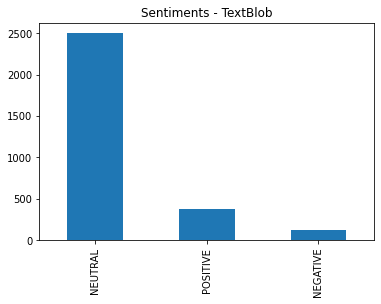

In [ ]:
#TEXTBLOB SENTIMENT ANALYSIS
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
reviews_df['TBSentimentVal'] = reviews_df['Cleaned_Review_2'].apply(lambda x: get_polarity(x))
reviews_df['TBSentiment']=np.where(reviews_df['TBSentimentVal']>=0.25,'POSITIVE',
                                         np.where(reviews_df['TBSentimentVal']<=-0.25,'NEGATIVE',
                                                  np.where((reviews_df['TBSentimentVal']>-0.25) & 
                                                           (reviews_df['TBSentimentVal']<0.25),'NEUTRAL','Unassigned')))
reviews_df.TBSentiment.value_counts().plot(kind='bar',title="Sentiments - TextBlob")

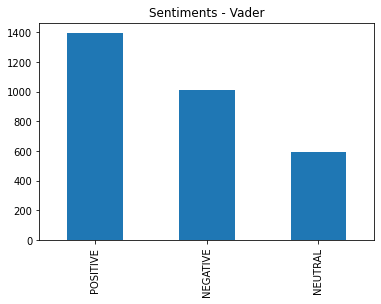

In [ ]:
#VADER SENTIMENT ANALYSIS
sid_obj = SentimentIntensityAnalyzer()
#output is a dictionary which contains pos, neg, neu, and compound scores.
reviews_df['VaderSentimentDict'] = reviews_df['Cleaned_Review_2'].apply(lambda x: sid_obj.polarity_scores(x))
reviews_df['VaderSentimentVal'] = reviews_df['VaderSentimentDict'].apply(lambda scores_dict: scores_dict['compound'])    
reviews_df['VaderSentiment']=np.where(reviews_df['VaderSentimentVal']>=0.25,'POSITIVE',
                                         np.where(reviews_df['VaderSentimentVal']<=-0.25,'NEGATIVE',
                                                  np.where((reviews_df['VaderSentimentVal']>-0.25) & 
                                                           (reviews_df['VaderSentimentVal']<0.25),'NEUTRAL','Unassigned')))
reviews_df.VaderSentiment.value_counts().plot(kind='bar',title="Sentiments - Vader")

## BERT with Tensorflow - Sentiment Analysis
https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671 

### Required imports and loading model

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


### Get the Data from the Stanford Repo

In [ ]:
URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
                                  origin=URL,
                                  untar=True,
                                  cache_dir='.',
                                  cache_subdir='')

84140032/84125825 [==============================] - 2s 0us/step


### Remove Unlabeled Reviews

In [ ]:
# The shutil module offers a number of high-level 
# operations on files and collections of files.
import os
import shutil
# Create main directory path ("/aclImdb")
main_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
# Create sub directory path ("/aclImdb/train")
train_dir = os.path.join(main_dir, 'train')
# Remove unsup folder since this is a supervised learning task
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)
# View the final train folder
print(os.listdir(train_dir))

['unsupBow.feat', 'urls_pos.txt', 'urls_unsup.txt', 'pos', 'labeledBow.feat', 'neg', 'urls_neg.txt']


### Train and Test Split

In [ ]:
# We create a training dataset and a validation 
# dataset from our "aclImdb/train" directory with a 80/20 split.
train = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='training', seed=123)
test = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='validation', seed=123)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


### Convert to Pandas to View and Process

In [ ]:
for i in train.take(1):
  train_feat = i[0].numpy()
  train_lab = i[1].numpy()

train = pd.DataFrame([train_feat, train_lab]).T
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,Canadian director Vincenzo Natali took the art...,1
1,I gave this film 10 not because it is a superb...,1
2,I admit to being somewhat jaded about the movi...,1
3,"For a long time, 'The Menagerie' was my favori...",1
4,A truly frightening film. Feels as if it were ...,0


### doing the same operations for the test dataset

In [ ]:
for j in test.take(1):
  test_feat = j[0].numpy()
  test_lab = j[1].numpy()

test = pd.DataFrame([test_feat, test_lab]).T
test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
test['DATA_COLUMN'] = test['DATA_COLUMN'].str.decode("utf-8")
test.head()

,DATA_COLUMN,LABEL_COLUMN
0,I can't believe that so much talent can be was...,0
1,This movie blows - let's get that straight rig...,0
2,"The saddest thing about this ""tribute"" is that...",0
3,I'm only rating this film as a 3 out of pity b...,0
4,Something surprised me about this movie - it w...,1


### Creating Input Sequences

In [ ]:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

### Creating two main functions:

##### 1 — convert_data_to_examples: This will accept our train and test datasets and convert each row into an InputExample object.

##### 2 — convert_examples_to_tf_dataset: This function will tokenize the InputExample objects, then create the required input format with the tokenized objects, finally, create an input dataset that we can feed to the model.



In [ ]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

### calling the functions created above

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


### Configuring the BERT model and Fine-tuning

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history = model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
1250/1250 [==============================] - 1137s 885ms/step - loss: 0.2718 - accuracy: 0.8860 - val_loss: 0.3703 - val_accuracy: 0.8814
Epoch 2/2
1250/1250 [==============================] - 1105s 884ms/step - loss: 0.0786 - accuracy: 0.9736 - val_loss: 0.4863 - val_accuracy: 0.8780


### save model and history and load saved model and history

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Models/SentimentBertWithTF/IMDBTrainedModel/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Models/SentimentBertWithTF/IMDBTrainedModel/assets


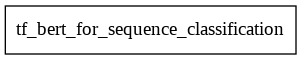

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Colab_Models/SentimentBertWithTF/IMDBTrainedModel')
# # Dump the history object as dictionary
with open('/content/drive/MyDrive/Colab_Models/SentimentBertWithTF/IMDBTrainedModel/IMDBTrainedModel_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
modelloaded = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Models/SentimentBertWithTF/IMDBTrainedModel')
model_name = "IMDBTrainedModel"
plot_model(modelloaded, to_file='/content/drive/MyDrive/Colab_Models/SentimentBertWithTF/IMDBTrainedModel.png', show_shapes=True)
#Load history
historyloaded = pickle.load(open('/content/drive/MyDrive/Colab_Models/SentimentBertWithTF/IMDBTrainedModel/IMDBTrainedModel_history.pkl','rb'))

### Making Predictions

In [ ]:
sentiments = []
for iteration in range(int(len(list(reviews_df['Cleaned_Review_2']))/10)):
    pred_sentences = list(reviews_df['Cleaned_Review_2'])[iteration*10:iteration*10+10]
    # print(len(pred_sentences))
    tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
    tf_outputs = model(tf_batch)
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
    labels = ['Negative','Positive']
    label = tf.argmax(tf_predictions, axis=1)
    label = label.numpy()
    for i in range(len(pred_sentences)):
        sentiments.append(labels[label[i]])
#   print(pred_sentences[i], ": \n", labels[label[i]])

In [ ]:
reviews_df['BertTF_Sentiment'] = sentiments

## Trying various word embeddings

### Word2Vec with Tensorflow Hub trained on wikipedia corpus
https://github.com/minsuk-heo/tf2/blob/master/jupyter_notebooks/10.Word2Vec_LSTM.ipynb 

In [ ]:
# Load Pretrained Word2Vec
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
def get_word2vec_enc(reviews):
    """
    get word2vec value for each word in sentence.
    concatenate word in numpy array, so we can use it as RNN input
    """
    encoded_reviews = []
    for review in reviews:
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews

word2vec_embeddings = get_word2vec_enc(list(reviews_df['Cleaned_Review_2']))
reviews_df['w2vEmbedding']=word2vec_embeddings
def get_padded_encoded_reviews(reviews_df):
    """
    for short sentences, we prepend zero padding so all input to RNN has same length
    """
    max_length = 0
    for row in list(reviews_df['Cleaned_Review_2']):
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    print("Max-wordlength=",max_length)
    padded_reviews_encoding = []
    iter=0
    for enc_review in list(reviews_df['w2vEmbedding']):
        zero_padding_cnt = max_length - enc_review.shape[0]
        pad = np.zeros((1, 250))
        for i in range(zero_padding_cnt):
            enc_review = np.concatenate((pad, enc_review), axis=0)
        iter+=1
        padded_reviews_encoding.append(enc_review)
        print('done with padding - ',iter)
    return padded_reviews_encoding
word2vec_padded_embeddings = get_padded_encoded_reviews(reviews_df)
reviews_df['w2v_PaddedEmbedding']=word2vec_padded_embeddings

def label_encode(label):
    """
    return one hot encoding for Y value
    """
    if label == 'P':
        return [1,0]
    else:
        return [0,1]
labels = reviews_df['Label'].tolist()
encoded_label = [label_encode(label) for label in labels]
reviews_df['Label_Encoded']=encoded_label
reviews_df.to_excel('/content/drive/MyDrive/Colab_Data/Reviews_Labels_PostW2V_Embedding.xlsx',header=True,index=False)

Max-wordlength= 3275
done with padding -  1
done with padding -  2
done with padding -  3
done with padding -  4
done with padding -  5
done with padding -  6
done with padding -  7
done with padding -  8
done with padding -  9
done with padding -  10
done with padding -  11
done with padding -  12
done with padding -  13
done with padding -  14
done with padding -  15
done with padding -  16
done with padding -  17
done with padding -  18
done with padding -  19
done with padding -  20
done with padding -  21
done with padding -  22
done with padding -  23
done with padding -  24
done with padding -  25
done with padding -  26
done with padding -  27
done with padding -  28
done with padding -  29
done with padding -  30
done with padding -  31
done with padding -  32
done with padding -  33
done with padding -  34
done with padding -  35
done with padding -  36
done with padding -  37
done with padding -  38
done with padding -  39
done with padding -  40
done with padding -  41
done

In [ ]:
reviews_df=pd.read_excel('/content/drive/MyDrive/Colab_Data/Reviews_Labels_PostW2V_Embedding.xlsx')
def preprocess(df):
    padded_encoded_reviews = list(df['w2v_PaddedEmbedding'])
    encoded_label = list(df['Label_Encoded'])
    X = np.array(padded_encoded_reviews)
    Y = np.array(encoded_label)
    return X, Y
reviews_df_trunc=reviews_df.head(1000)
train_X, train_Y = preprocess(reviews_df_trunc)

In [ ]:
print("training features shape:",np.shape(train_X))
print("training labels shape:",np.shape(train_Y))

training features shape: (1000,)
training labels shape: (1000,)


In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
print('Train...')
model.fit(train_X, train_Y,epochs=50)

Train...
Epoch 1/50


ValueError: ignored

In [ ]:
"""
movie_reviews_train = [
         {'review': 'this is the best movie', 'sentiment': 'positive'},
         {'review': 'i recommend you watch this movie', 'sentiment': 'positive'},
         {'review': 'it was waste of money and time', 'sentiment': 'negative'},
         {'review': 'the worst movie ever', 'sentiment': 'negative'}
    ]
"""
test_df = pd.read_excel("/content/drive/MyDrive/Colab_Data/Reviews_Labels_PostW2V_Embedding.xlsx")
print(test_df.shape)
test_df_trunc=test_df.tail(2000)
print(test_df_trunc.shape)
test_X, test_Y = preprocess(test_df_trunc)

score, acc = model.evaluate(test_X, test_Y, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

## Writing out the current dataframe

In [ ]:
reviews_df.to_excel('Reviews_Labels.xlsx',header=True,index=False)

### Some Text